### 코인간의 상관관계를 계산합니다.

"KRW-BTC"  
"KRW-ETH"  
"KRW-IOTA"  

KRW-XEM : 에러처리를 어떻게 해야하는지..

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

### 상관관계를 위한 데이터를 로드합니다.

In [8]:
import pandas as pd
import pyupbit
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from time import sleep

#
# coin_list = ["KRW-BTC", "KRW-ETH", "KRW-IOTA"]
# tickers = ["KRW-BTC", "KRW-ETH"]
tickers = pyupbit.get_tickers(fiat="KRW")

df = {}
for coin in tickers:
    data = pyupbit.get_ohlcv(coin)
    if data is not None:
        df[coin] = data["close"]
    else:
        print(coin)
    sleep(0.1)
    
df = pd.DataFrame(df)


#### DATA를 확인합니다.

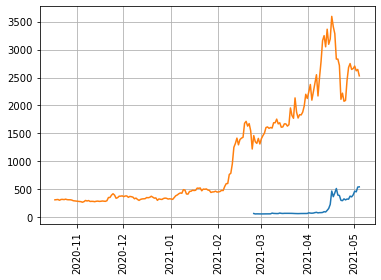

In [9]:
plt.plot(df["KRW-DOGE"])
plt.plot(df["KRW-IOTA"])

plt.grid()
plt.xticks(rotation=90)
plt.show()

#### CORR

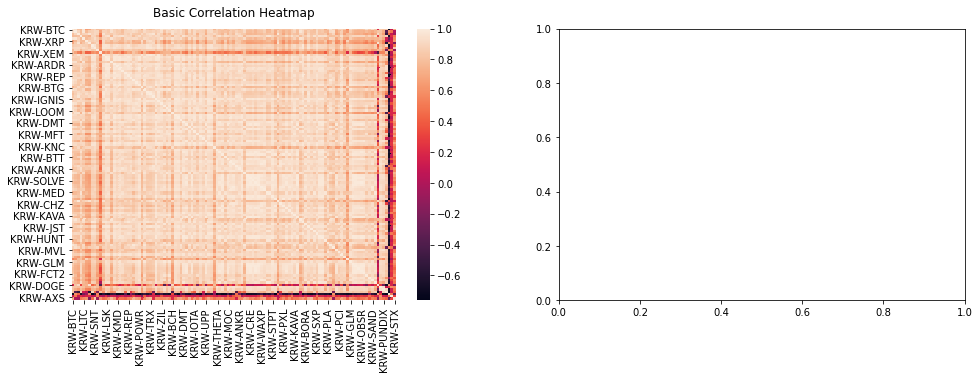

In [10]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 5))

#  기본 그래프 [Basic Correlation Heatmap]
sns.heatmap(df.corr(), ax=ax[0])
ax[0].set_title('Basic Correlation Heatmap', pad = 12)

# # 상관관계 수치 그래프 [Correlation Heatmap with Number]
# sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, ax=ax[1])
# ax[1].set_title('Correlation Heatmap with Number', pad = 12)df_price["%"] = (df_price["cur"] - df_price[df_price.columns[0]])*100/df_price[df_price.columns[0]] 
con = df_price[df_price.columns[0]] - df_price["cur"] < 0

print(len(df_price), df_price.cur[con].count())
df_price[con].tail(20)

plt.show()


### IOTA을 중심으로 데이터를 관찰합니다.

#### IOTA와의 corr

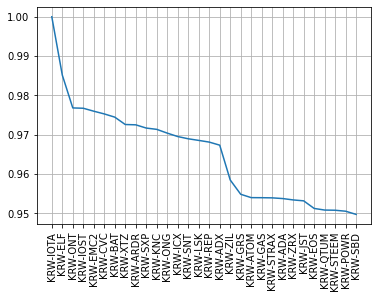

In [11]:
corr = df.corr()
iota = corr["KRW-IOTA"]

corr_top = iota.sort_values(ascending=False)
plt.plot(corr_top.head(30))

plt.grid()
plt.xticks(rotation=90)
plt.show()


#### 상위 10에 대한 상관관계를 알아본다.

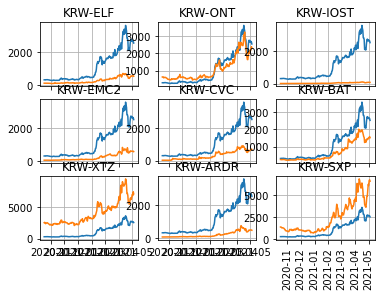

In [14]:
fig, axs = plt.subplots(3, 3, sharex='all')

for i, ticker in enumerate(corr_top.head(10).index[1:]):
    axs[int(i/3), i%3].plot(df["KRW-IOTA"])
    axs[int(i/3), i%3].plot(df[ticker])
    axs[int(i/3), i%3].set(title=ticker)
    axs[int(i/3), i%3].grid()
#     axs[int(i/3), i%3].xticks(rotation=90)

plt.xticks(rotation=90)
plt.show()

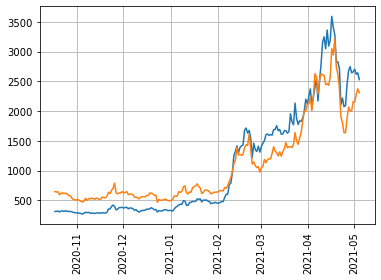

In [13]:
plt.plot(df["KRW-IOTA"])
plt.plot(df["KRW-ONT"])

plt.grid()
plt.xticks(rotation=90)
plt.show()